<a href="https://colab.research.google.com/github/cuboneadv/DA_School_1/blob/main/230825_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

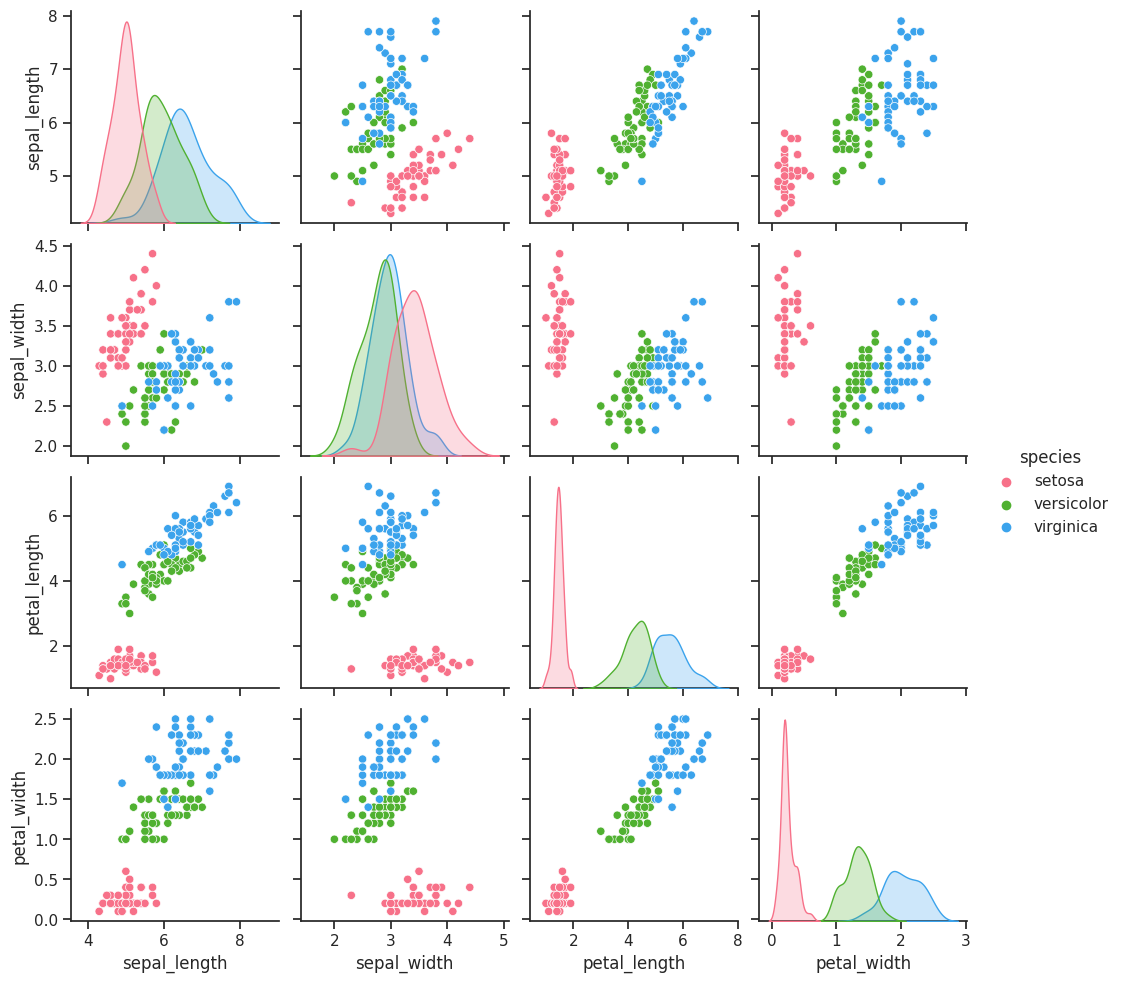

In [ ]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")

In [ ]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [ ]:
model = Sequential()
# input_dim = 784, 완전 연결층, 완전 밀집층에서 사용, 정형 데이터에 사용
# input_shape = (28, 28, 1), dim은 그냥 숫자로 쓰고, shape는 튜플 형태로 묶는다., input_shape만 써도 상관X

model.add(Dense(64, input_shape=(4,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)
# 배치 사이즈를 설정하지 않으면 batch_size = 32
# 처음에는 시드 고정할 필요 없지만, 연구가 끝나갈 때 쯤엔 고정하는 것이 맞다.

Epoch 1/100
4/4 [==============================] - 3s 144ms/step - loss: 0.9929 - accuracy: 0.3667 - val_loss: 0.9695 - val_accuracy: 0.2333
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.8947 - accuracy: 0.5583 - val_loss: 0.8850 - val_accuracy: 0.5667
Epoch 3/100
4/4 [==============================] - 0s 29ms/step - loss: 0.8080 - accuracy: 0.6917 - val_loss: 0.8205 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 27ms/step - loss: 0.7410 - accuracy: 0.6917 - val_loss: 0.7541 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 0s 25ms/step - loss: 0.6780 - accuracy: 0.6917 - val_loss: 0.7074 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 26ms/step - loss: 0.6199 - accuracy: 0.6917 - val_loss: 0.6395 - val_accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 25ms/step - loss: 0.5705 - accuracy: 0.7000 - val_loss: 0.6016 - val_accuracy: 0.6000
Epoch 8/100
4/4 [==

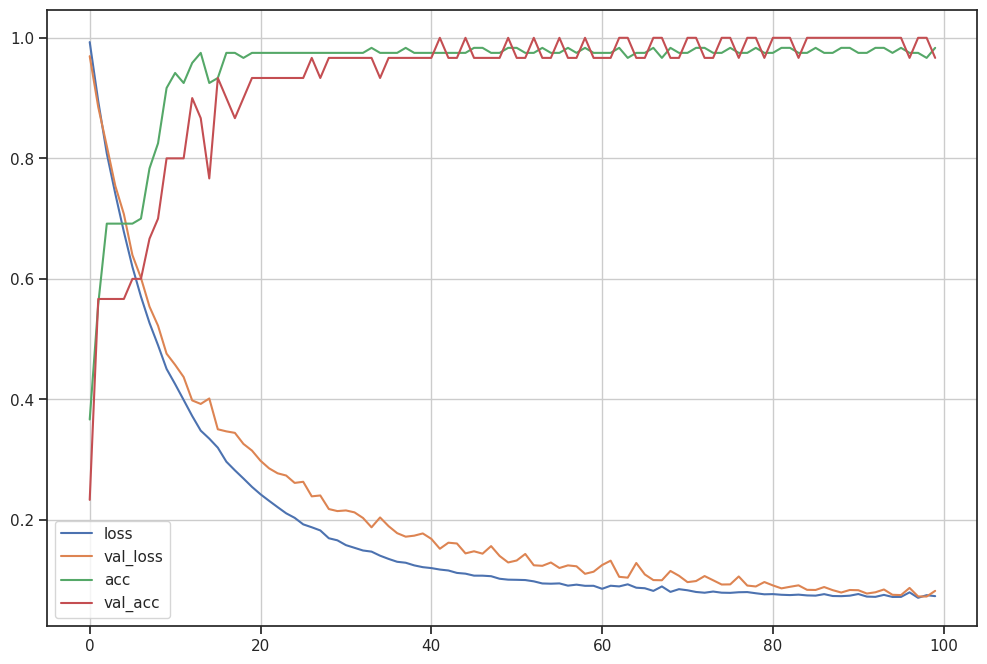

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

1/1 [==============================] - 0s 118ms/step - loss: 0.0824 - accuracy: 0.9667
Accuracy = 0.97


In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

1/1 [==============================] - 0s 189ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


---

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 임의의 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=20, n_redundant=0, n_informative=2, random_state=42, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구조 정의
model = Sequential([
    Dense(8, activation='relu', input_dim=20),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test))

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200
10/10 [==============================] - 4s 83ms/step - loss: 0.7164 - accuracy: 0.5500 - val_loss: 0.7207 - val_accuracy: 0.4500
Epoch 2/200
10/10 [==============================] - 0s 10ms/step - loss: 0.7082 - accuracy: 0.5500 - val_loss: 0.7164 - val_accuracy: 0.5000
Epoch 3/200
10/10 [==============================] - 0s 11ms/step - loss: 0.7021 - accuracy: 0.5625 - val_loss: 0.7131 - val_accuracy: 0.5000
Epoch 4/200
10/10 [==============================] - 0s 15ms/step - loss: 0.6975 - accuracy: 0.6000 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 5/200
10/10 [==============================] - 0s 11ms/step - loss: 0.6927 - accuracy: 0.6125 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.6887 - accuracy: 0.6000 - val_loss: 0.7031 - val_accuracy: 0.5000
Epoch 7/200
10/10 [==============================] - 0s 11ms/step - loss: 0.6842 - accuracy: 0.6250 - val_loss: 0.7004 - val_accuracy: 0.5000
Epoch 

In [ ]:
#모델 저장
model.save('model_test.hdf5')

In [ ]:
#모델 불러오기
from tensorflow.keras.models import load_model
model = load_model('model_test.hdf5')

In [ ]:
#모델 성능 재확인
loss_n, accuracy_n = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss_n:.4f}")
print(f"Test Accuracy: {accuracy_n:.4f}")

1/1 [==============================] - 0s 175ms/step - loss: 0.9951 - accuracy: 0.9000
Test Loss: 0.9951
Test Accuracy: 0.9000


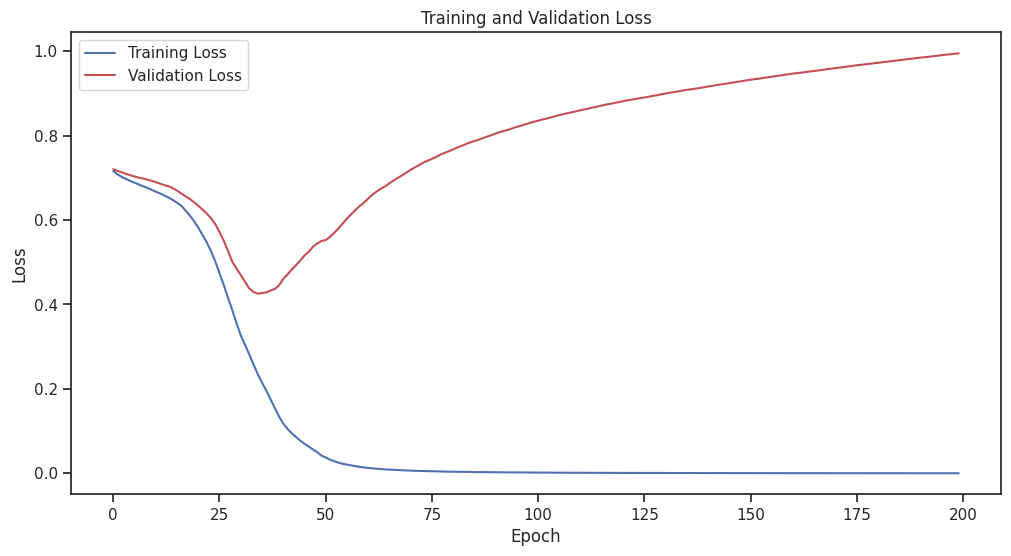

In [ ]:
import matplotlib.pyplot as plt

# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# 임의의 데이터셋 생성
X, y = make_classification(n_samples=100, n_features=20, n_redundant=0, n_informative=2, random_state=42, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 구조 정의
model = Sequential([
    Dense(8, activation='relu', input_dim=20),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping 콜백 정의
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# 모델 학습 (early stopping 적용)
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 테스트 데이터로 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/200
10/10 [==============================] - 2s 55ms/step - loss: 0.6983 - accuracy: 0.5250 - val_loss: 0.6858 - val_accuracy: 0.6000
Epoch 2/200
10/10 [==============================] - 0s 14ms/step - loss: 0.6925 - accuracy: 0.5375 - val_loss: 0.6849 - val_accuracy: 0.6000
Epoch 3/200
10/10 [==============================] - 0s 12ms/step - loss: 0.6883 - accuracy: 0.5625 - val_loss: 0.6839 - val_accuracy: 0.7000
Epoch 4/200
10/10 [==============================] - 0s 11ms/step - loss: 0.6846 - accuracy: 0.5875 - val_loss: 0.6818 - val_accuracy: 0.6500
Epoch 5/200
10/10 [==============================] - 0s 11ms/step - loss: 0.6806 - accuracy: 0.6375 - val_loss: 0.6802 - val_accuracy: 0.7000
Epoch 6/200
10/10 [==============================] - 0s 10ms/step - loss: 0.6760 - accuracy: 0.6375 - val_loss: 0.6784 - val_accuracy: 0.7000
Epoch 7/200
10/10 [==============================] - 0s 13ms/step - loss: 0.6715 - accuracy: 0.6750 - val_loss: 0.6767 - val_accuracy: 0.7000
Epoch 

In [ ]:
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

val_acc_list = []
fold_num = 1
results = {}

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # 모델 구조 정의
    model = Sequential([
        Dense(128, activation='relu', input_dim=20),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 학습
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # 검증 데이터로 평가
    _, val_acc = model.evaluate(X_val, y_val, verbose=0)
    val_acc_list.append(val_acc)

    # 각 fold의 결과 저장
    results[f"Fold {fold_num} Accuracy"] = val_acc
    fold_num += 1

NameError: ignored

In [ ]:
results

# K-fold 결과 출력
print(f"5-fold Validation Accuracy: {np.mean(val_acc_list):.4f} ± {np.std(val_acc_list):.4f}")

In [ ]:
import matplotlib.pyplot as plt

# 학습 오차와 검증 오차 그래프 그리기
plt.figure(figsize=(12, 6))

# 학습 데이터의 오차
plt.plot(history.history['loss'], 'b-', label='Training Loss')
# 검증 데이터의 오차
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

---

## Mnist_Passion

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

4422102/4422102 [==============================] - 0s 0us/step
Training data shape: (60000, 28, 28) (60000,)
Test data shape: (10000, 28, 28) (10000,)


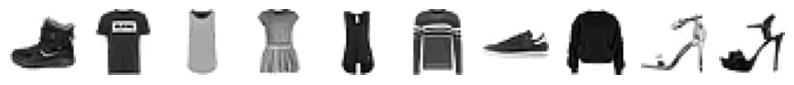

In [ ]:
# 1. 데이터 로딩 및 탐색

# 데이터 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 데이터 형태 출력
print("Training data shape:", train_input.shape, train_target.shape)
print("Test data shape:", test_input.shape, test_target.shape)

# 처음 10개의 이미지를 시각화
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [ ]:
# 처음 10개의 타겟 레이블 출력
print("First 10 training labels:", [train_target[i] for i in range(10)])

First 10 training labels: [9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


labels_and_names = [(label, class_names[label]) for label in train_target[:10]]
labels_and_names

[(9, 'Ankle boot'),
 (0, 'T-shirt/top'),
 (0, 'T-shirt/top'),
 (3, 'Dress'),
 (0, 'T-shirt/top'),
 (2, 'Pullover'),
 (7, 'Sneaker'),
 (2, 'Pullover'),
 (5, 'Sandal'),
 (5, 'Sandal')]

In [ ]:
# 타겟 레이블의 고유한 값 및 각 레이블의 개수 출력
unique_targets, counts = np.unique(train_target, return_counts=True)
print("Unique target labels:", unique_targets)
print("Counts of each label:", counts)

Unique target labels: [0 1 2 3 4 5 6 7 8 9]
Counts of each label: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28, 28)

In [ ]:
# 3. 모델 생성 및 컴파일

# 단순한 완전 연결 계층을 사용한 모델 생성
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 입력 데이터를 1D로 변환
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# 4. 모델 학습
history = model.fit(train_scaled, train_target, epochs=5)
# validation_data=(val_scaled, val_target)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5844 - accuracy: 0.8009
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4654 - accuracy: 0.8421
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4443 - accuracy: 0.8494
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4337 - accuracy: 0.8530
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4268 - accuracy: 0.8550


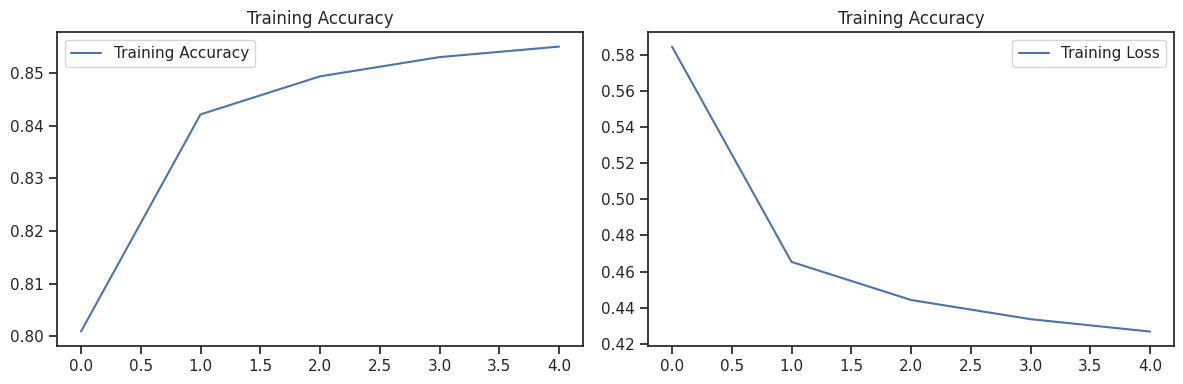

In [ ]:
# 6. 결과 시각화

# 훈련 및 검증 정확도 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy')
# plt.title('Training vs. Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training Accuracy')
# plt.title('Training vs. Validation Loss')

plt.tight_layout()
plt.show()



---